# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
# don't  close. Otherwise we'll have to reboot the entire unity environment
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

# My turn

In [7]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In this part we implement the dqn wrapper function. What this function does is, **for each episode**, loop over the number of rounds (here called `max_t`) and 

1. take an action (action + step)
2. gather the environment response (state + reward)
3. act and gather environment response once again (because we're using Q-lerning)
4. check if we achieved the target score for that episode (done -> bool). If so, end episode

After completing those steps, in an episode, we check if we achieved the overall performance goal (mean reward of 13 over 100 episodes). If so end learning and if not, continue learning until `n_episodes` is over.

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, target_score = 13):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment - LEONARDO
        state = env_info.vector_observations[0]            # get the current state - LEONARDO
        score = 0
        
        for t in range(max_t):
            
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment - LEONARDO
            next_state = env_info.vector_observations[0]   # get the next state - LEONARDO
            reward = env_info.rewards[0]                   # get the reward - LEONARDO
            done = env_info.local_done[0]                  # see if episode has finished - LEONARDO
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break 
        
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window) >= target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

Here we invoke the DQN neural network `dqn_agent` from the `Agent` file. There we have the classic DQN neural network with `experience replay` in order to stabilize training (remember that the correlation between the sequential samples makes the NN learning a bit unstable). 

The neural network used here is a simple 3 fully connected layer, where the last FC layer has output length equal to 4, the number of actions (left, right, forward, backward). Other option is to add a convolution layer in the beggining, before the FC layers.

In [9]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=42)
# scores = dqn(n_episodes=200, max_t=1000)
scores = dqn(n_episodes=5000, max_t=1000)
# scores = dqn()

Episode 100	Average Score: 0.96
Episode 200	Average Score: 5.58
Episode 300	Average Score: 8.06
Episode 400	Average Score: 10.63
Episode 500	Average Score: 12.10
Episode 545	Average Score: 13.01
Environment solved in 445 episodes!	Average Score: 13.01


The plot bellow shows the average score per 100 episodes. We can see that the agent learns very fast and that in 445 episodes it already has figured out how to behave in the environment in order to gather as many bananas as possible. 

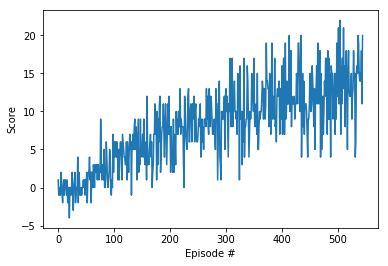

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# No Early Stopping 

From the last plot we can see that maybe if we increase the number of episodes, we can get even better at the task. So how training would've gone if we didn't do the early stopping? Lets train the agent for about 3000 thousand episodes and see how things go! 

**note**: not tunning max_t by the way

In [13]:
def dqn_no_callback(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, target_score = 13):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment - LEONARDO
        state = env_info.vector_observations[0]            # get the current state - LEONARDO
        score = 0
        
        for t in range(max_t):
            
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment - LEONARDO
            next_state = env_info.vector_observations[0]   # get the next state - LEONARDO
            reward = env_info.rewards[0]                   # get the reward - LEONARDO
            done = env_info.local_done[0]                  # see if episode has finished - LEONARDO
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break 
        
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
#         if np.mean(scores_window) >= target_score:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
#             torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
#             break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_no_callback.pth')
            
    return scores

In [14]:
scores_no_callback = dqn_no_callback(n_episodes=3000, max_t=1000)

Episode 100	Average Score: 1.92
Episode 200	Average Score: 6.40
Episode 300	Average Score: 10.46
Episode 400	Average Score: 12.13
Episode 500	Average Score: 12.76
Episode 600	Average Score: 14.17
Episode 700	Average Score: 14.40
Episode 800	Average Score: 15.10
Episode 900	Average Score: 14.76
Episode 1000	Average Score: 15.28
Episode 1100	Average Score: 15.45
Episode 1200	Average Score: 16.16
Episode 1300	Average Score: 14.70
Episode 1400	Average Score: 14.99
Episode 1500	Average Score: 15.76
Episode 1600	Average Score: 15.07
Episode 1700	Average Score: 15.65
Episode 1800	Average Score: 15.86
Episode 1900	Average Score: 15.08
Episode 2000	Average Score: 15.31
Episode 2100	Average Score: 15.30
Episode 2200	Average Score: 14.96
Episode 2300	Average Score: 16.44
Episode 2400	Average Score: 15.78
Episode 2500	Average Score: 15.10
Episode 2600	Average Score: 15.54
Episode 2700	Average Score: 14.95
Episode 2800	Average Score: 15.39
Episode 2900	Average Score: 14.80
Episode 3000	Average Scor

As we can see from the plot bellow, there's some evidence that performance stabilizes around 15 and doesn't get better as we increase the number of episodes. But given that we've already solved our task and the agent remains good at it, that's ok.

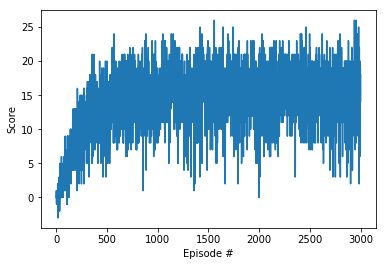

In [15]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_no_callback)), scores_no_callback)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [1]:
!tar -czf new_sol.tar.gz *

tar: new_sol.tar.gz: file changed as we read it
